In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

In [3]:
# Define the path to the general folder
path = "/content/drive/MyDrive/new/train"

In [4]:
# Set the batch size and image dimensions
batch_size = 16
image_size = (224, 224)  # You may adjust this based on your dataset and chosen pre-trained model


In [5]:
# Create data generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

Found 426 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

Found 105 images belonging to 2 classes.


In [8]:
# Load a pre-trained model (e.g., VGG16) with weights trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 4s 0us/step


In [10]:
# Create a custom classifier on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # Adjust the number of output classes


In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [12]:
# display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 21137986 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     epochs=10  # Adjust the number of epochs as needed
# )

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15  # Adjust the number of epochs as needed
)

Epoch 1/15
26/26 [==============================] - 214s 7s/step - loss: 4258.9111 - accuracy: 0.5216 - val_loss: 0.6925 - val_accuracy: 0.5417
Epoch 2/15
26/26 [==============================] - 17s 669ms/step - loss: 0.6980 - accuracy: 0.5366 - val_loss: 0.6999 - val_accuracy: 0.4375
Epoch 3/15
26/26 [==============================] - 18s 694ms/step - loss: 0.6946 - accuracy: 0.5244 - val_loss: 0.6924 - val_accuracy: 0.5208
Epoch 4/15
26/26 [==============================] - 16s 602ms/step - loss: 0.6909 - accuracy: 0.5463 - val_loss: 0.6906 - val_accuracy: 0.5417
Epoch 5/15
26/26 [==============================] - 15s 568ms/step - loss: 0.6887 - accuracy: 0.5561 - val_loss: 0.6899 - val_accuracy: 0.5417
Epoch 6/15
26/26 [==============================] - 15s 557ms/step - loss: 0.6879 - accuracy: 0.5561 - val_loss: 0.6881 - val_accuracy: 0.5521
Epoch 7/15
26/26 [==============================] - 15s 592ms/step - loss: 0.6883 - accuracy: 0.5488 - val_loss: 0.6897 - val_accuracy: 0.541

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

11/11 [==============================] - 2s 182ms/step - loss: 0.6931 - accuracy: 0.5227
Test accuracy: 52.27%


In [14]:
model.save("/content/drive/MyDrive/new/prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/new/prediction.h5")

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 21137986 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 142ms/step


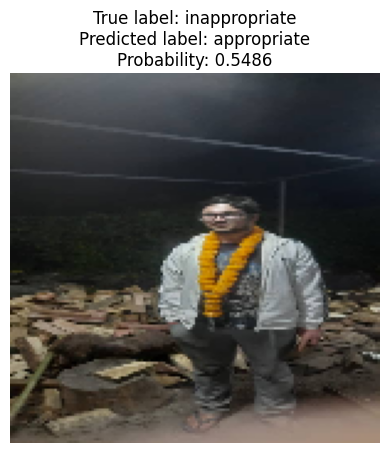

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/drive/MyDrive/new/prediction.h5")

# Define the path to the test images
test_dir = "/content/drive/MyDrive/new/test"

# Define the dictionary to map the class indices to their respective class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Function to preprocess the image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Get the list of all images in the test directory
test_images = os.listdir(test_dir)

# Pick a correctly classified image
correct_image_path = os.path.join(test_dir, 'inappropriate', '8 (1).jpg')

# Preprocess the image
correct_image = preprocess_image(correct_image_path)

# Get the true label of the image
true_label = os.path.basename(os.path.dirname(correct_image_path))

# Get the predicted label of the image
predicted_prob = model.predict(correct_image)[0]
predicted_label = class_names[np.argmax(predicted_prob)]

# Display the image
plt.imshow(load_img(correct_image_path, target_size=(150, 150)))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_label}\nProbability: {predicted_prob[np.argmax(predicted_prob)]:.4f}')
plt.axis('off')
plt.show()

# # Pick a misclassified image
# misclassified_image_path = os.path.join(test_dir, 'WithMask', 'Augmented_49_7071345.png')

# # Preprocess the image
# misclassified_image = preprocess_image(misclassified_image_path)

# # Get the true label of the image
# true_label = os.path.basename(os.path.dirname(misclassified_image_path))

# # Get the predicted label of the image
# predicted_prob = model.predict(misclassified_image)[0]
# predicted_label = class_names[np.argmax(predicted_prob)]

# Display the image
# plt.imshow(load_img(misclassified_image_path, target_size=(150, 150)))
# plt.title(f'True label: {true_label}\nPredicted label: {predicted_label}\nProbability: {predicted_prob[np.argmax(predicted_prob)]:.4f}')
# plt.axis('off')
# plt.show()